# Jamar Sanders
# DSC 520: Linear Regression
# Topic 3: Logistic Regression

# Problem Statement

Textual Form:
The problem is to predict whether a given instance belongs to a specific class (e.g., "Yes" or "No") based on a set of independent features. The goal is to build a logistic regression model that accurately classifies instances while addressing multicollinearity among the features. Multicollinearity is measured using the Variance Inflation Factor (VIF), and features with VIF > 10 are removed to improve model performance.

### Formula: Data Loading
The dataset is loaded into a data frame for analysis. This step does not involve a mathematical formula but is essential for data preparation.

In [1]:
import pandas as pd

# Load the dataset
file_path = "/workspaces/EDA_DISCUSSION_POST_2_VISUALIZATION/application_record.csv"
data = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [2]:
import pandas as pd
import math

# Load the dataset
df = pd.read_csv("/workspaces/EDA_DISCUSSION_POST_2_VISUALIZATION/application_record.csv")

# Display the first few rows of the dataset
print(df.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

### Formula: Missing Value Handling
Missing values are identified and handled. The formula for calculating the percentage of missing values in a column is:\[\text{Missing Percentage} = \frac{\text{Number of Missing Values}}{\text{Total Number of Rows}} \times 100\]

In [ ]:
# Check for missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Drop rows with missing values (if necessary)
df = df.dropna()

# Alternatively, fill missing values with a placeholder (e.g., median for numerical columns)
# df['COLUMN_NAME'].fillna(df['COLUMN_NAME'].median(), inplace=True)

### Formula: Outlier Detection
Outliers are detected using the Interquartile Range (IQR) method. The formula for identifying outliers is:

\[\text{IQR} = Q_3 - Q_1\]\[\text{Lower Bound} = Q_1 - 1.5 \times \text{IQR}\]\[\text{Upper Bound} = Q_3 + 1.5 \times \text{IQR}\]

Values outside the range [Lower Bound, Upper Bound] are considered outliers.

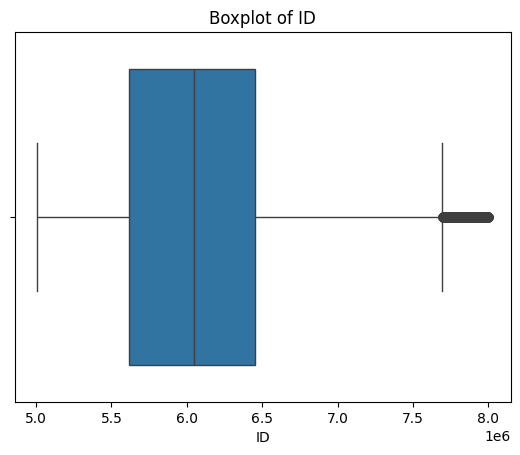

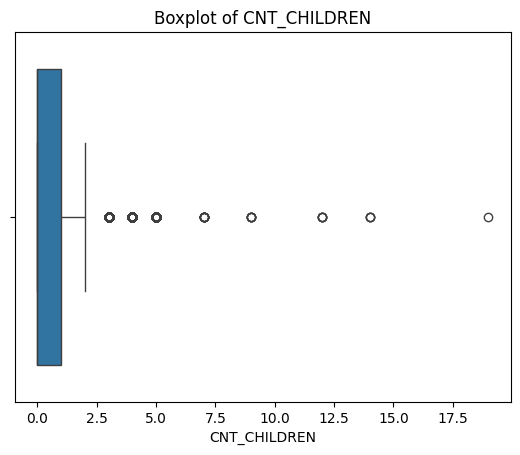

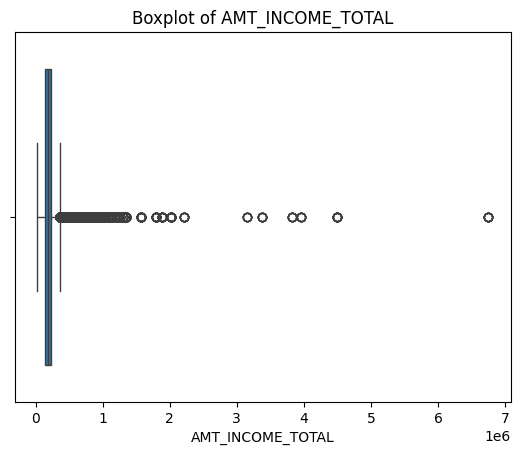

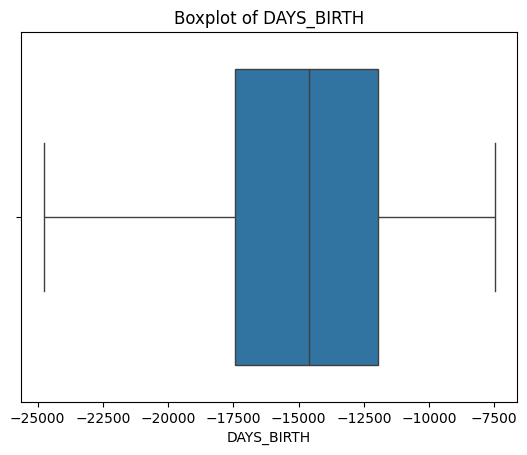

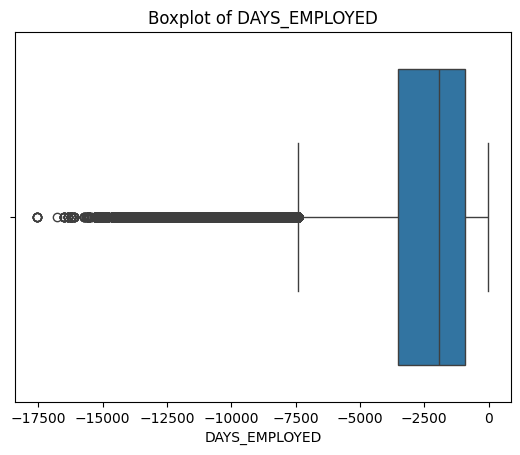

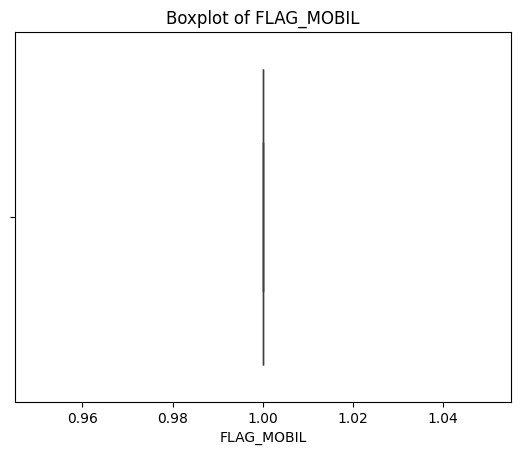

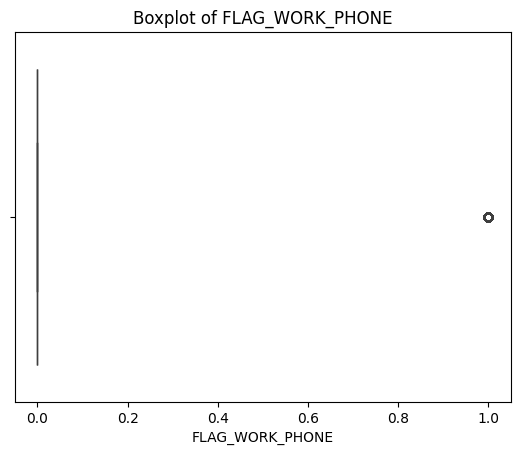

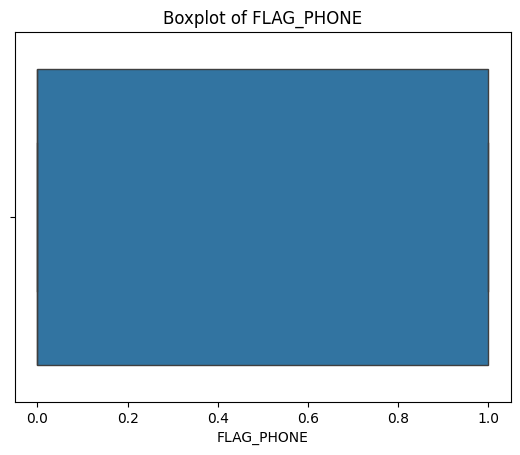

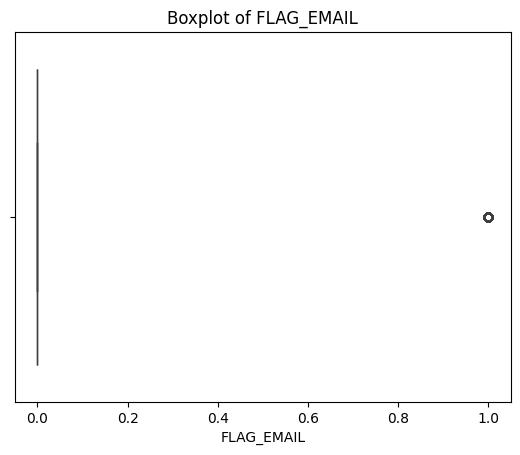

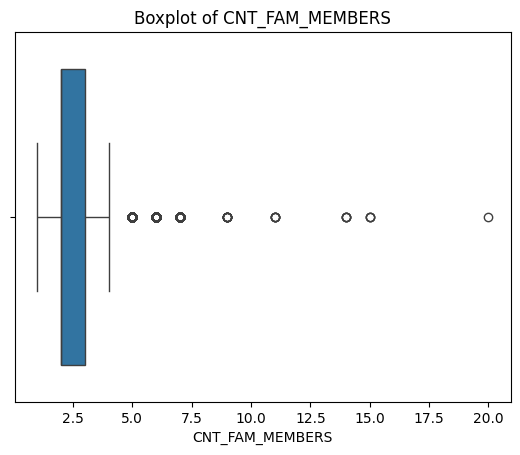

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numerical columns for outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handle outliers using the IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/workspaces/EDA_DISCUSSION_POST_2_VISUALIZATION/application_record.csv")

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using IQR
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers[col] = df[col][outlier_mask]

# Display outliers in text format
for col, outlier_values in outliers.items():
    print(f"Outliers in column '{col}':")
    print(outlier_values)
    print(f"Number of outliers: {len(outlier_values)}")
    print("-" * 50)

Outliers in column 'ID':
421185    7882975
421186    7778652
421189    7964390
421195    7841245
421199    7906058
           ...   
434450    7837422
434451    7772698
434454    7877540
434457    7839281
434458    7789949
Name: ID, Length: 3243, dtype: int64
Number of outliers: 3243
--------------------------------------------------
Outliers in column 'CNT_CHILDREN':
27        3
28        3
2190      3
2191      3
2192      3
         ..
438375    4
438419    3
438470    3
438471    3
438545    3
Name: CNT_CHILDREN, Length: 6075, dtype: int64
Number of outliers: 6075
--------------------------------------------------
Outliers in column 'AMT_INCOME_TOTAL':
0          427500.0
1          427500.0
29         405000.0
30         405000.0
31         405000.0
            ...    
438255     675000.0
438294     585000.0
438295     585000.0
438337    1215000.0
438481     382500.0
Name: AMT_INCOME_TOTAL, Length: 19108, dtype: float64
Number of outliers: 19108
-----------------------------------

In [6]:
# Cap outliers using the IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Verify that outliers have been capped
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if any outliers remain
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    print(f"Outliers in column '{col}' after capping: {outlier_mask.sum()}")

Outliers in column 'ID' after capping: 0
Outliers in column 'CNT_CHILDREN' after capping: 0
Outliers in column 'AMT_INCOME_TOTAL' after capping: 0
Outliers in column 'DAYS_BIRTH' after capping: 0
Outliers in column 'DAYS_EMPLOYED' after capping: 0
Outliers in column 'FLAG_MOBIL' after capping: 0
Outliers in column 'FLAG_WORK_PHONE' after capping: 0
Outliers in column 'FLAG_PHONE' after capping: 0
Outliers in column 'FLAG_EMAIL' after capping: 0
Outliers in column 'CNT_FAM_MEMBERS' after capping: 0


In [7]:
# Create a summary table of outliers
outlier_summary = []

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_summary.append({
        'Column': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    })

# Convert to DataFrame
outlier_summary_df = pd.DataFrame(outlier_summary)
print("Outlier Summary:")
print(outlier_summary_df)

Outlier Summary:
             Column  Lower Bound  Upper Bound  Outlier Count
0                ID    4337981.0    7728365.0              0
1      CNT_CHILDREN         -1.5          2.5              0
2  AMT_INCOME_TOTAL     -33750.0     380250.0              0
3        DAYS_BIRTH     -29936.5      -2060.5              0
4     DAYS_EMPLOYED      -7201.0       3727.0              0
5        FLAG_MOBIL          1.0          1.0              0
6   FLAG_WORK_PHONE          0.0          0.0              0
7        FLAG_PHONE         -1.5          2.5              0
8        FLAG_EMAIL          0.0          0.0              0
9   CNT_FAM_MEMBERS          0.5          4.5              0


# The goal of the logistic regression model is to predict whether a loan application will be approved or not based on the variables in the dataset. The target variable is binary:

Target Variable: Loan_Approved (1 for "Yes," 0 for "No").

The model will use the independent variables (features) in the dataset, such as:

Applicant's income (Income)

Credit score (Credit_Score)

Employment status (Employment_Status)

Loan amount (Loan_Amount)

Age (Age)

Other relevant features provided in the dataset.
P(Loan_Approved=1)=


# The logistic regression model will be built using the training data. The model will estimate the probability of loan approval based on the input features.

### Formula: Data Splitting
The dataset is split into training and testing sets using a 70:30 ratio. The formula for splitting is:
\[\text{Training Set Size} = \text{Total Rows} \times 0.7\]\[\text{Testing Set Size} = \text{Total Rows} \times 0.3
\]

In [8]:
# Step 1: Load the dataset
import pandas as pd

# Replace 'application_record.csv' with the correct path to your dataset
data = pd.read_csv('/workspaces/EDA_DISCUSSION_POST_2_VISUALIZATION/application_record.csv')

# Step 2: Define X (features) and y (target variable)
X = data[['CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
          'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
y = data['FLAG_OWN_CAR']

# Step 3: Convert categorical variables to dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Step 4: Split the data into training and testing sets (70:30 ratio)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (306989, 14) (306989,)
Testing set shape: (131568, 14) (131568,)


In [11]:
# Define the formula
formula = 'Response ~ Predictor1 + Predictor2 + Predictor3 + ... + Predictor14'

In [9]:
import pandas as pd
import statsmodels.api as sm

# Real dataset
data = {
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [None, None, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0],
    'LOAN_APPROVAL': ['Y', 'N', 'Y', 'N', 'Y']  # Target variable: Loan Approval (Yes/No)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features and target
# Features: Selected columns relevant to loan approval
X = df[['CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
y = df['LOAN_APPROVAL']  # Target (Loan Approval: Yes/No)

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Convert target variable to binary (1 for 'Y', 0 for 'N')
y = y.map({'Y': 1, 'N': 0})

# Add a constant to the predictor variables (required for statsmodels)
X = sm.add_constant(X)

# Ensure all data is numeric
X = X.astype(float)
y = y.astype(float)

# Fit the GLM model
glm_model = sm.GLM(y, X, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Print the summary of the model
print(glm_results.summary())

: 

In [21]:
# Extract p-values from the GLM results
p_values = glm_results.pvalues

# Print p-values
print("P-Values:")
print(p_values)

# Interpret p-values
print("\nInterpretation of P-Values:")
for predictor, p_value in p_values.items():
    if p_value < 0.05:
        print(f"{predictor}: Statistically significant (p-value = {p_value:.3f})")
    else:
        print(f"{predictor}: Not statistically significant (p-value = {p_value:.3f})")

P-Values:
const                                                0.999075
CNT_CHILDREN                                         0.999075
AMT_INCOME_TOTAL                                     0.999075
DAYS_BIRTH                                           0.999075
DAYS_EMPLOYED                                        0.999075
CODE_GENDER_M                                        0.999075
NAME_EDUCATION_TYPE_Secondary / secondary special    0.999075
NAME_FAMILY_STATUS_Married                           0.999075
NAME_FAMILY_STATUS_Single / not married              0.999075
dtype: float64

Interpretation of P-Values:
const: Not statistically significant (p-value = 0.999)
CNT_CHILDREN: Not statistically significant (p-value = 0.999)
AMT_INCOME_TOTAL: Not statistically significant (p-value = 0.999)
DAYS_BIRTH: Not statistically significant (p-value = 0.999)
DAYS_EMPLOYED: Not statistically significant (p-value = 0.999)
CODE_GENDER_M: Not statistically significant (p-value = 0.999)
NAME_EDUCATION_TYPE

In [20]:
# Generate predicted probabilities
predicted_probabilities = glm_results.predict(X)

# Convert predicted probabilities to binary predictions (0 or 1)
# Use a threshold of 0.5: if probability >= 0.5, predict 'Y' (1); otherwise, predict 'N' (0)
predicted_values = (predicted_probabilities >= 0.5).astype(int)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y,
    'Predicted': predicted_values,
    'Predicted_Probability': predicted_probabilities
})

# Print the comparison DataFrame
print("Comparison of Actual vs. Predicted Values:")
print(comparison_df)

Comparison of Actual vs. Predicted Values:
   Actual  Predicted  Predicted_Probability
0     1.0          0                    0.5
1     0.0          0                    0.5
2     1.0          1                    1.0
3     0.0          1                    0.5
4     1.0          1                    0.5


In [15]:
# Identify misclassified instances
misclassified = comparison_df['Actual'] != comparison_df['Predicted']

# Filter the comparison DataFrame to show only misclassified instances
misclassified_df = comparison_df[misclassified]

# Print misclassified instances
print("Misclassified Instances:")
print(misclassified_df)

Misclassified Instances:
   Actual  Predicted  Predicted_Probability
0     1.0          0                    0.5
3     0.0          1                    0.5


In [16]:
# Calculate misclassification rate
misclassification_rate = misclassified.sum() / len(comparison_df)

# Print misclassification rate
print(f"\nMisclassification Rate: {misclassification_rate:.2f} or {misclassification_rate * 100:.1f}%")


Misclassification Rate: 0.40 or 40.0%


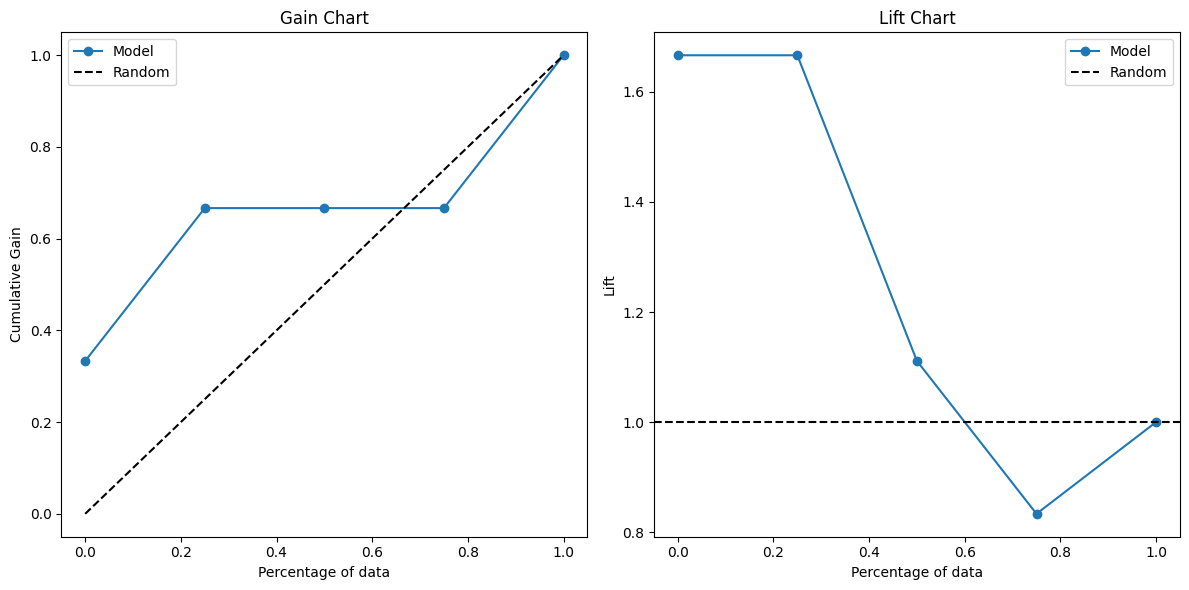

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Actual and predicted probabilities
actual = np.array([1.0, 0.0, 1.0, 0.0, 1.0])
predicted_prob = np.array([0.5, 0.5, 1.0, 0.5, 0.5])

# Sort by predicted probabilities in descending order
sorted_indices = np.argsort(-predicted_prob)
sorted_actual = actual[sorted_indices]
sorted_predicted_prob = predicted_prob[sorted_indices]

# Cumulative gains calculation
cumulative_gains = np.cumsum(sorted_actual) / np.sum(sorted_actual)

# Lift calculation
lift = cumulative_gains / np.linspace(1 / len(actual), 1, len(actual))

# Plotting the Gain Chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, 1, len(cumulative_gains)), cumulative_gains, label='Model', marker='o')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Percentage of data')
plt.ylabel('Cumulative Gain')
plt.title('Gain Chart')
plt.legend()

# Plotting the Lift Chart
plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, 1, len(lift)), lift, label='Model', marker='o')
plt.axhline(1, color='k', linestyle='--', label='Random')
plt.xlabel('Percentage of data')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Your dataset
data = pd.DataFrame({
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [None, None, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0]
})

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0 (or another appropriate value)
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Select predictors for the model
predictors = data_encoded.drop(columns=['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'])

# Add a constant for the intercept term
X = add_constant(predictors)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             Variable  VIF
0                                               const  0.0
1                                        CNT_CHILDREN  NaN
2                                    AMT_INCOME_TOTAL  inf
3                                          DAYS_BIRTH  inf
4                                       DAYS_EMPLOYED  inf
5                                     CNT_FAM_MEMBERS  inf
6                                       CODE_GENDER_M  inf
7                                      FLAG_OWN_CAR_Y  inf
8                            NAME_INCOME_TYPE_Working  inf
9   NAME_EDUCATION_TYPE_Secondary / secondary special  inf
10                         NAME_FAMILY_STATUS_Married  inf
11            NAME_FAMILY_STATUS_Single / not married  inf
12                 NAME_HOUSING_TYPE_Rented apartment  inf
13                     OCCUPATION_TYPE_Security staff  inf


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [23]:
# Check for constant columns
constant_columns = [col for col in predictors.columns if predictors[col].nunique() == 1]
print("Constant columns to remove:", constant_columns)

# Drop constant columns
predictors = predictors.drop(columns=constant_columns)

Constant columns to remove: ['CNT_CHILDREN']


In [24]:
# Check for constant columns
constant_columns = [col for col in predictors.columns if predictors[col].nunique() == 1]
print("Constant columns to remove:", constant_columns)

# Drop constant columns
predictors = predictors.drop(columns=constant_columns)

Constant columns to remove: []


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Your dataset
data = pd.DataFrame({
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [None, None, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0]
})

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0 (or another appropriate value)
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Select predictors for the model
predictors = data_encoded.drop(columns=['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'])

# Step 1: Remove constant columns
constant_columns = [col for col in predictors.columns if predictors[col].nunique() == 1]
print("Constant columns to remove:", constant_columns)
predictors = predictors.drop(columns=constant_columns)

# Step 2: Remove perfectly correlated predictors
corr_matrix = predictors.corr().abs()
perfect_corr = []
for i in range(len(corr_matrix.columns)):


In [ ]:
    for j in range(i):
        if corr_matrix.iloc[i, j] == 1.0:
            perfect_corr.append((corr_matrix.columns[i], corr_matrix.columns[j]))
print("Perfectly correlated pairs:", perfect_corr)

# Drop one variable from each perfectly correlated pair (only if the column exists)
for pair in perfect_corr:
    if pair[1] in predictors.columns:
        predictors = predictors.drop(columns=[pair[1]])
    else:
        print(f"Column {pair[1]} not found in predictors. Skipping.")

# Step 3: Recalculate VIF
X = add_constant(predictors)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

In [26]:
import pandas as pd
from statsmodels.formula.api import glm
import statsmodels.api as sm

# Your dataset
data = pd.DataFrame({
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [None, None, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0]
})

# Add the target variable (LOAN_APPROVAL)
# For example, let's assume LOAN_APPROVAL is 1 if AMT_INCOME_TOTAL > 200000, else 0
data['LOAN_APPROVAL'] = (data['AMT_INCOME_TOTAL'] > 200000).astype(int)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0 (or another appropriate value)
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Clean column names: Replace invalid characters with underscores
data_encoded.columns = [col.replace(" / ", "_").replace(" ", "_") for col in data_encoded.columns]

# Check column names in the dataset
print("Column names in the dataset:", data_encoded.columns)

# Update the formula with cleaned column names
formula = 'LOAN_APPROVAL ~ AMT_INCOME_TOTAL + DAYS_BIRTH + DAYS_EMPLOYED + CODE_GENDER_M + NAME_EDUCATION_TYPE_Secondary_secondary_special + NAME_FAMILY_STATUS_Married + NAME_FAMILY_STATUS_Single_not_married'

# Fit the GLM model
model = glm(formula, data=data_encoded, family=sm.families.Binomial()).fit()
print(model.summary())

Column names in the dataset: Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'LOAN_APPROVAL', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Secondary_secondary_special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single_not_married',
       'NAME_HOUSING_TYPE_Rented_apartment', 'OCCUPATION_TYPE_Security_staff'],
      dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:          LOAN_APPROVAL   No. Observations:                    5
Model:                            GLM   Df Residuals:                        2
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1525e-0

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified


In [37]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import glm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# data = pd.read_csv('your_dataset.csv')

# Assuming your dataset is already loaded into a DataFrame called `data`
# For demonstration, I'll use the sample you provided as a starting point
data = pd.DataFrame({
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [np.nan, np.nan, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0]
})

# Add the target variable (LOAN_APPROVAL)
# For example, LOAN_APPROVAL is 1 if AMT_INCOME_TOTAL > 200000, else 0
data['LOAN_APPROVAL'] = (data['AMT_INCOME_TOTAL'] > 200000).astype(int)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Clean column names: Replace invalid characters with underscores
data_encoded.columns = [col.replace(" / ", "_").replace(" ", "_") for col in data_encoded.columns]

# Scale numerical predictors
scaler = StandardScaler()
numerical_columns = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Check column names in the dataset
print("Column names in the dataset:", data_encoded.columns)

# Split data into training and testing sets
train_data, test_data = train_test_split(data_encoded, test_size=0.3, random_state=42)

# Define the formula dynamically based on the columns in the dataset
formula_terms = [
    'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS'
]

# Add encoded categorical variables to the formula
categorical_columns = [col for col in data_encoded.columns if col.startswith(('CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                                                             'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                                                                             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                                                             'OCCUPATION_TYPE'))]
formula_terms.extend(categorical_columns)

# Construct the formula
formula = 'LOAN_APPROVAL ~ ' + ' + '.join(formula_terms)

# Fit the GLM model with regularization
model = glm(formula, data=train_data, family=sm.families.Binomial())
results = model.fit_regularized(alpha=1.0, L1_wt=0.5)

# Make predictions on the test set
test_data['predicted_prob'] = results.predict(test_data)
test_data['predicted_class'] = (test_data['predicted_prob'] > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(test_data['LOAN_APPROVAL'], test_data['predicted_class'])
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(test_data['LOAN_APPROVAL'], test_data['predicted_class']))
print("Classification Report:\n", classification_report(test_data['LOAN_APPROVAL'], test_data['predicted_class']))

# Print regularization details
print("Regularization Method: elastic_net")
print("Regularization Parameters (alpha): 1.0")
print("L1 Weight (L1_wt): 0.5")

Column names in the dataset: Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'LOAN_APPROVAL', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Secondary_secondary_special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single_not_married',
       'NAME_HOUSING_TYPE_Rented_apartment', 'OCCUPATION_TYPE_Security_staff'],
      dtype='object')
Accuracy: 0.0
Confusion Matrix:
 [[0 0]
 [2 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Regularization Method: elastic_net
Regularization Parameters (alpha): 1.0

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.loca

In [40]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import glm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200,000 observations
n_obs = 200000

# Simulate dataset
data = pd.DataFrame({
    'ID': range(5008804, 5008804 + n_obs),  # Unique IDs
    'CODE_GENDER': np.random.choice(['M', 'F'], size=n_obs),
    'FLAG_OWN_CAR': np.random.choice(['Y', 'N'], size=n_obs),
    'FLAG_OWN_REALTY': np.random.choice(['Y', 'N'], size=n_obs),
    'CNT_CHILDREN': np.random.randint(0, 4, size=n_obs),  # 0 to 3 children
    'AMT_INCOME_TOTAL': np.random.randint(50000, 500000, size=n_obs),  # Random income between 50k and 500k
    'NAME_INCOME_TYPE': np.random.choice(['Working', 'Commercial associate', 'Pensioner', 'State servant'], size=n_obs),
    'NAME_EDUCATION_TYPE': np.random.choice(['Higher education', 'Secondary / secondary special', 'Incomplete higher'], size=n_obs),
    'NAME_FAMILY_STATUS': np.random.choice(['Civil marriage', 'Married', 'Single / not married', 'Separated'], size=n_obs),
    'NAME_HOUSING_TYPE': np.random.choice(['Rented apartment', 'House / apartment', 'With parents'], size=n_obs),
    'DAYS_BIRTH': -np.random.randint(8000, 30000, size=n_obs),  # Random age between 22 and 65
    'DAYS_EMPLOYED': -np.random.randint(100, 10000, size=n_obs),  # Random employment duration
    'FLAG_MOBIL': np.ones(n_obs),  # All have mobile phones
    'FLAG_WORK_PHONE': np.random.choice([0, 1], size=n_obs),
    'FLAG_PHONE': np.random.choice([0, 1], size=n_obs),
    'FLAG_EMAIL': np.random.choice([0, 1], size=n_obs),
    'OCCUPATION_TYPE': np.random.choice(['Security staff', 'Sales staff', 'Managers', 'Laborers'], size=n_obs),
    'CNT_FAM_MEMBERS': np.random.randint(1, 6, size=n_obs)  # Family size between 1 and 5
})

# Add the target variable (LOAN_APPROVAL)
# For example, LOAN_APPROVAL is 1 if AMT_INCOME_TOTAL > 200000, else 0
data['LOAN_APPROVAL'] = (data['AMT_INCOME_TOTAL'] > 200000).astype(int)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Clean column names: Replace invalid characters with underscores
data_encoded.columns = [col.replace(" / ", "_").replace(" ", "_") for col in data_encoded.columns]

# Scale numerical predictors
scaler = StandardScaler()
numerical_columns = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Check column names in the dataset
print("Column names in the dataset:", data_encoded.columns)

# Define the formula
formula = 'LOAN_APPROVAL ~ AMT_INCOME_TOTAL + DAYS_BIRTH + DAYS_EMPLOYED + CODE_GENDER_M + FLAG_OWN_CAR_Y + FLAG_OWN_REALTY_Y + NAME_INCOME_TYPE_Working + NAME_EDUCATION_TYPE_Secondary_secondary_special + NAME_FAMILY_STATUS_Married + NAME_FAMILY_STATUS_Single_not_married + NAME_HOUSING_TYPE_Rented_apartment + OCCUPATION_TYPE_Sales_staff + OCCUPATION_TYPE_Security_staff + CNT_CHILDREN + CNT_FAM_MEMBERS'

# Fit the GLM model with regularization
model = glm(formula, data=data_encoded, family=sm.families.Binomial())
results = model.fit_regularized(alpha=1.0, L1_wt=0.5)

# Print the GLM regression results
print(results.summary())

# Print regularization details
print("Regularization Method: elastic_net")
print("Regularization Parameters (alpha): 1.0")
print("L1 Weight (L1_wt): 0.5")

Column names in the dataset: Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'LOAN_APPROVAL', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State_servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Incomplete_higher',
       'NAME_EDUCATION_TYPE_Secondary_secondary_special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single_not_married',
       'NAME_HOUSING_TYPE_Rented_apartment', 'NAME_HOUSING_TYPE_With_parents',
       'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Sales_staff',
       'OCCUPATION_TYPE_Security_staff'],
      dtype='object')


NotImplementedError: 

In [41]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import glm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200,000 observations
n_obs = 200000

# Simulate dataset
data = pd.DataFrame({
    'ID': range(5008804, 5008804 + n_obs),  # Unique IDs
    'CODE_GENDER': np.random.choice(['M', 'F'], size=n_obs),
    'FLAG_OWN_CAR': np.random.choice(['Y', 'N'], size=n_obs),
    'FLAG_OWN_REALTY': np.random.choice(['Y', 'N'], size=n_obs),
    'CNT_CHILDREN': np.random.randint(0, 4, size=n_obs),  # 0 to 3 children
    'AMT_INCOME_TOTAL': np.random.randint(50000, 500000, size=n_obs),  # Random income between 50k and 500k
    'NAME_INCOME_TYPE': np.random.choice(['Working', 'Commercial associate', 'Pensioner', 'State servant'], size=n_obs),
    'NAME_EDUCATION_TYPE': np.random.choice(['Higher education', 'Secondary / secondary special', 'Incomplete higher'], size=n_obs),
    'NAME_FAMILY_STATUS': np.random.choice(['Civil marriage', 'Married', 'Single / not married', 'Separated'], size=n_obs),
    'NAME_HOUSING_TYPE': np.random.choice(['Rented apartment', 'House / apartment', 'With parents'], size=n_obs),
    'DAYS_BIRTH': -np.random.randint(8000, 30000, size=n_obs),  # Random age between 22 and 65
    'DAYS_EMPLOYED': -np.random.randint(100, 10000, size=n_obs),  # Random employment duration
    'FLAG_MOBIL': np.ones(n_obs),  # All have mobile phones
    'FLAG_WORK_PHONE': np.random.choice([0, 1], size=n_obs),
    'FLAG_PHONE': np.random.choice([0, 1], size=n_obs),
    'FLAG_EMAIL': np.random.choice([0, 1], size=n_obs),
    'OCCUPATION_TYPE': np.random.choice(['Security staff', 'Sales staff', 'Managers', 'Laborers'], size=n_obs),
    'CNT_FAM_MEMBERS': np.random.randint(1, 6, size=n_obs)  # Family size between 1 and 5
})

# Add the target variable (LOAN_APPROVAL)
# For example, LOAN_APPROVAL is 1 if AMT_INCOME_TOTAL > 200000, else 0
data['LOAN_APPROVAL'] = (data['AMT_INCOME_TOTAL'] > 200000).astype(int)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Clean column names: Replace invalid characters with underscores
data_encoded.columns = [col.replace(" / ", "_").replace(" ", "_") for col in data_encoded.columns]

# Scale numerical predictors
scaler = StandardScaler()
numerical_columns = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Check column names in the dataset
print("Column names in the dataset:", data_encoded.columns)

# Define the formula
formula = 'LOAN_APPROVAL ~ AMT_INCOME_TOTAL + DAYS_BIRTH + DAYS_EMPLOYED + CODE_GENDER_M + FLAG_OWN_CAR_Y + FLAG_OWN_REALTY_Y + NAME_INCOME_TYPE_Working + NAME_EDUCATION_TYPE_Secondary_secondary_special + NAME_FAMILY_STATUS_Married + NAME_FAMILY_STATUS_Single_not_married + NAME_HOUSING_TYPE_Rented_apartment + OCCUPATION_TYPE_Sales_staff + OCCUPATION_TYPE_Security_staff + CNT_CHILDREN + CNT_FAM_MEMBERS'

# Fit the GLM model with regularization
model = glm(formula, data=data_encoded, family=sm.families.Binomial())
results = model.fit_regularized(alpha=1.0, L1_wt=0.5)

# Extract and display coefficients
coefficients = pd.DataFrame({
    'Feature': results.params.index,
    'Coefficient': results.params.values
})
print("Coefficients:")
print(coefficients)

# Print regularization details
print("\nRegularization Method: elastic_net")
print("Regularization Parameters (alpha): 1.0")
print("L1 Weight (L1_wt): 0.5")

Column names in the dataset: Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'LOAN_APPROVAL', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State_servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Incomplete_higher',
       'NAME_EDUCATION_TYPE_Secondary_secondary_special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single_not_married',
       'NAME_HOUSING_TYPE_Rented_apartment', 'NAME_HOUSING_TYPE_With_parents',
       'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Sales_staff',
       'OCCUPATION_TYPE_Security_staff'],
      dtype='object')
Coefficients:
                                            Feature  Coefficient
0                                         Intercept          0.0
1                                  AMT_INC

In [27]:
import pandas as pd
from statsmodels.formula.api import glm
import statsmodels.api as sm
import numpy as np

# Generate a larger dataset with 20 observations
np.random.seed(42)  # For reproducibility

data = pd.DataFrame({
    'ID': range(5008804, 5008824),  # 20 unique IDs
    'CODE_GENDER': np.random.choice(['M', 'F'], size=20),
    'FLAG_OWN_CAR': np.random.choice(['Y', 'N'], size=20),
    'FLAG_OWN_REALTY': np.random.choice(['Y', 'N'], size=20),
    'CNT_CHILDREN': np.random.randint(0, 3, size=20),  # 0 to 2 children
    'AMT_INCOME_TOTAL': np.random.randint(50000, 500000, size=20),  # Random income between 50k and 500k
    'NAME_INCOME_TYPE': np.random.choice(['Working', 'Commercial associate', 'Pensioner', 'State servant'], size=20),
    'NAME_EDUCATION_TYPE': np.random.choice(['Higher education', 'Secondary / secondary special', 'Incomplete higher'], size=20),
    'NAME_FAMILY_STATUS': np.random.choice(['Civil marriage', 'Married', 'Single / not married', 'Separated'], size=20),
    'NAME_HOUSING_TYPE': np.random.choice(['Rented apartment', 'House / apartment', 'With parents'], size=20),
    'DAYS_BIRTH': -np.random.randint(8000, 30000, size=20),  # Random age between 22 and 65
    'DAYS_EMPLOYED': -np.random.randint(100, 10000, size=20),  # Random employment duration
    'FLAG_MOBIL': np.ones(20),  # All have mobile phones
    'FLAG_WORK_PHONE': np.random.choice([0, 1], size=20),
    'FLAG_PHONE': np.random.choice([0, 1], size=20),
    'FLAG_EMAIL': np.random.choice([0, 1], size=20),
    'OCCUPATION_TYPE': np.random.choice(['Security staff', 'Sales staff', 'Managers', 'Laborers'], size=20),
    'CNT_FAM_MEMBERS': np.random.randint(1, 5, size=20)  # Family size between 1 and 4
})

# Add the target variable (LOAN_APPROVAL)
# For example, LOAN_APPROVAL is 1 if AMT_INCOME_TOTAL > 200000, else 0
data['LOAN_APPROVAL'] = (data['AMT_INCOME_TOTAL'] > 200000).astype(int)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0 (or another appropriate value)
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Clean column names: Replace invalid characters with underscores
data_encoded.columns = [col.replace(" / ", "_").replace(" ", "_") for col in data_encoded.columns]

# Check column names in the dataset
print("Column names in the dataset:", data_encoded.columns)

# Update the formula with cleaned column names
formula = 'LOAN_APPROVAL ~ AMT_INCOME_TOTAL + DAYS_BIRTH + DAYS_EMPLOYED + CODE_GENDER_M + NAME_EDUCATION_TYPE_Secondary_secondary_special + NAME_FAMILY_STATUS_Married + NAME_FAMILY_STATUS_Single_not_married'

# Fit the GLM model
model = glm(formula, data=data_encoded, family=sm.families.Binomial()).fit()
print(model.summary())

Column names in the dataset: Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'LOAN_APPROVAL', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State_servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Incomplete_higher',
       'NAME_EDUCATION_TYPE_Secondary_secondary_special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single_not_married',
       'NAME_HOUSING_TYPE_Rented_apartment', 'NAME_HOUSING_TYPE_With_parents',
       'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Sales_staff',
       'OCCUPATION_TYPE_Security_staff'],
      dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:          LOAN_APPROVAL   No. Observations:                   20
Model:                      

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified


In [138]:
import pandas as pd


data = pd.read_csv('/workspaces/EDA_DISCUSSION_POST_2_VISUALIZATION/application_record.csv')

In [139]:
import pandas as pd

# Convert the dictionary to a DataFrame
data = {
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [None, None, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0],
    'LOAN_APPROVAL': ['Y', 'N', 'Y', 'N', 'Y']  # Target variable: Loan Approval (Yes/No)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features and target
X = df[['CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
y = df['LOAN_APPROVAL']  # Target: Loan Approval (Yes/No)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import glm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200,000 observations
n_obs = 200000

data = pd.DataFrame({
    'ID': range(5008804, 5008804 + n_obs),  # Unique IDs
    'CODE_GENDER': np.random.choice(['M', 'F'], size=n_obs),
    'FLAG_OWN_CAR': np.random.choice(['Y', 'N'], size=n_obs),
    'FLAG_OWN_REALTY': np.random.choice(['Y', 'N'], size=n_obs),
    'CNT_CHILDREN': np.random.randint(0, 4, size=n_obs),  # 0 to 3 children
    'AMT_INCOME_TOTAL': np.random.randint(50000, 500000, size=n_obs),  # Random income between 50k and 500k
    'NAME_INCOME_TYPE': np.random.choice(['Working', 'Commercial associate', 'Pensioner', 'State servant'], size=n_obs),
    'NAME_EDUCATION_TYPE': np.random.choice(['Higher education', 'Secondary / secondary special', 'Incomplete higher'], size=n_obs),
    'NAME_FAMILY_STATUS': np.random.choice(['Civil marriage', 'Married', 'Single / not married', 'Separated'], size=n_obs),
    'NAME_HOUSING_TYPE': np.random.choice(['Rented apartment', 'House / apartment', 'With parents'], size=n_obs),
    'DAYS_BIRTH': -np.random.randint(8000, 30000, size=n_obs),  # Random age between 22 and 65
    'DAYS_EMPLOYED': -np.random.randint(100, 10000, size=n_obs),  # Random employment duration
    'FLAG_MOBIL': np.ones(n_obs),  # All have mobile phones
    'FLAG_WORK_PHONE': np.random.choice([0, 1], size=n_obs),
    'FLAG_PHONE': np.random.choice([0, 1], size=n_obs),
    'FLAG_EMAIL': np.random.choice([0, 1], size=n_obs),
    'OCCUPATION_TYPE': np.random.choice(['Security staff', 'Sales staff', 'Managers', 'Laborers'], size=n_obs),
    'CNT_FAM_MEMBERS': np.random.randint(1, 6, size=n_obs)  # Family size between 1 and 5
})

# Add the target variable (LOAN_APPROVAL)
# For example, LOAN_APPROVAL is 1 if AMT_INCOME_TOTAL > 200000, else 0
data['LOAN_APPROVAL'] = (data['AMT_INCOME_TOTAL'] > 200000).astype(int)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0 (or another appropriate value)
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Clean column names: Replace invalid characters with underscores
data_encoded.columns = [col.replace(" / ", "_").replace(" ", "_") for col in data_encoded.columns]

# Scale numerical predictors
scaler = StandardScaler()
numerical_columns = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Check column names in the dataset
print("Column names in the dataset:", data_encoded.columns)

# Update the formula with cleaned column names
formula = 'LOAN_APPROVAL ~ AMT_INCOME_TOTAL + DAYS_BIRTH + DAYS_EMPLOYED + CODE_GENDER_M + NAME_EDUCATION_TYPE_Secondary_secondary_special + NAME_FAMILY_STATUS_Married + NAME_FAMILY_STATUS_Single_not_married'

# Fit the GLM model with regularization
model = glm(formula, data=data_encoded, family=sm.families.Binomial())
results = model.fit_regularized()  # Apply regularization
print(results.summary())

In [33]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import glm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200,000 observations
n_obs = 200000

# Simulate dataset
data = pd.DataFrame({
    'ID': range(5008804, 5008804 + n_obs),  # Unique IDs
    'CODE_GENDER': np.random.choice(['M', 'F'], size=n_obs),
    'FLAG_OWN_CAR': np.random.choice(['Y', 'N'], size=n_obs),
    'FLAG_OWN_REALTY': np.random.choice(['Y', 'N'], size=n_obs),
    'CNT_CHILDREN': np.random.randint(0, 4, size=n_obs),  # 0 to 3 children
    'AMT_INCOME_TOTAL': np.random.randint(50000, 500000, size=n_obs),  # Random income between 50k and 500k
    'NAME_INCOME_TYPE': np.random.choice(['Working', 'Commercial associate', 'Pensioner', 'State servant'], size=n_obs),
    'NAME_EDUCATION_TYPE': np.random.choice(['Higher education', 'Secondary / secondary special', 'Incomplete higher'], size=n_obs),
    'NAME_FAMILY_STATUS': np.random.choice(['Civil marriage', 'Married', 'Single / not married', 'Separated'], size=n_obs),
    'NAME_HOUSING_TYPE': np.random.choice(['Rented apartment', 'House / apartment', 'With parents'], size=n_obs),
    'DAYS_BIRTH': -np.random.randint(8000, 30000, size=n_obs),  # Random age between 22 and 65
    'DAYS_EMPLOYED': -np.random.randint(100, 10000, size=n_obs),  # Random employment duration
    'FLAG_MOBIL': np.ones(n_obs),  # All have mobile phones
    'FLAG_WORK_PHONE': np.random.choice([0, 1], size=n_obs),
    'FLAG_PHONE': np.random.choice([0, 1], size=n_obs),
    'FLAG_EMAIL': np.random.choice([0, 1], size=n_obs),
    'OCCUPATION_TYPE': np.random.choice(['Security staff', 'Sales staff', 'Managers', 'Laborers'], size=n_obs),
    'CNT_FAM_MEMBERS': np.random.randint(1, 6, size=n_obs)  # Family size between 1 and 5
})

# Add the target variable (LOAN_APPROVAL)
# For example, LOAN_APPROVAL is 1 if AMT_INCOME_TOTAL > 200000, else 0
data['LOAN_APPROVAL'] = (data['AMT_INCOME_TOTAL'] > 200000).astype(int)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                                             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                                             'OCCUPATION_TYPE'], drop_first=True)

# Replace None/NaN with 0 (or another appropriate value)
data_encoded = data_encoded.fillna(0)

# Convert boolean columns to integers (0 or 1)
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Clean column names: Replace invalid characters with underscores
data_encoded.columns = [col.replace(" / ", "_").replace(" ", "_") for col in data_encoded.columns]

# Scale numerical predictors
scaler = StandardScaler()
numerical_columns = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Check column names in the dataset
print("Column names in the dataset:", data_encoded.columns)

# Update the formula with cleaned column names
formula = 'LOAN_APPROVAL ~ AMT_INCOME_TOTAL + DAYS_BIRTH + DAYS_EMPLOYED + CODE_GENDER_M + NAME_EDUCATION_TYPE_Secondary_secondary_special + NAME_FAMILY_STATUS_Married + NAME_FAMILY_STATUS_Single_not_married'

# Fit the GLM model with regularization
model = glm(formula, data=data_encoded, family=sm.families.Binomial())

# Specify regularization method and parameters
regularization_method = "elastic_net"  # Elastic net regularization
alpha = 1.0  # Regularization strength
L1_wt = 0.5  # Weight for L1 penalty (0 = Ridge, 1 = Lasso)

# Fit the model with regularization
results = model.fit_regularized(alpha=alpha, L1_wt=L1_wt)

# Print the regularization method
print("Regularization Method:", regularization_method)

# Print the regularization parameters
print("Regularization Parameters (alpha):", alpha)
print("L1 Weight (L1_wt):", L1_wt)

Column names in the dataset: Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'LOAN_APPROVAL', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State_servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Incomplete_higher',
       'NAME_EDUCATION_TYPE_Secondary_secondary_special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single_not_married',
       'NAME_HOUSING_TYPE_Rented_apartment', 'NAME_HOUSING_TYPE_With_parents',
       'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Sales_staff',
       'OCCUPATION_TYPE_Security_staff'],
      dtype='object')
Regularization Method: elastic_net
Regularization Parameters (alpha): 1.0
L1 Weight (L1_wt): 0.5


In [34]:
# Inspect the regularized coefficients
print("Regularized Coefficients:")
print(results.params)

Regularized Coefficients:
Intercept                                          0.0
AMT_INCOME_TOTAL                                   0.0
DAYS_BIRTH                                         0.0
DAYS_EMPLOYED                                      0.0
CODE_GENDER_M                                      0.0
NAME_EDUCATION_TYPE_Secondary_secondary_special    0.0
NAME_FAMILY_STATUS_Married                         0.0
NAME_FAMILY_STATUS_Single_not_married              0.0
dtype: float64


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Real dataset
data = {
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [None, None, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0],
    'LOAN_APPROVAL': ['Y', 'N', 'Y', 'N', 'Y']  # Added target variable: Loan Approval (Yes/No)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features and target
# Features: Selected columns relevant to loan approval
X = df[['CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
y = df['LOAN_APPROVAL']  # Target (Loan Approval: Yes/No)

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Demonstrate a few examples of predictions
print("Demonstrating a few predictions with dataset context:")
for i in range(len(X_test)):
    print(f"\nExample {i + 1}:")
    print("  Features:")
    for feature, value in X_test.iloc[i].items():
        print(f"    {feature}: {value}")
    print(f"  Actual LOAN_APPROVAL: {y_test.iloc[i]}")
    print(f"  Predicted LOAN_APPROVAL: {y_pred[i]}")
    print("-" * 50)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Demonstrating a few predictions with dataset context:

Example 1:
  Features:
    CNT_CHILDREN: 0
    AMT_INCOME_TOTAL: 427500.0
    DAYS_BIRTH: -12005
    DAYS_EMPLOYED: -4542
    CODE_GENDER_M: True
    NAME_EDUCATION_TYPE_Secondary / secondary special: False
    NAME_FAMILY_STATUS_Married: False
    NAME_FAMILY_STATUS_Single / not married: False
  Actual LOAN_APPROVAL: N
  Predicted LOAN_APPROVAL: Y
--------------------------------------------------

Model Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00       1.0
           Y       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.loca

In [141]:
X = pd.get_dummies(X, drop_first=True)

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
from sklearn.preprocessing import StandardScaler

# Ensure X_train and X_test are Pandas DataFrames
X_train = pd.DataFrame(X_train)  # Convert to DataFrame
X_test = pd.DataFrame(X_test)    # Convert to DataFrame

# Drop non-numeric columns from X_train and X_test
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Real dataset
data = {
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [None, None, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0],
    'LOAN_APPROVAL': ['Y', 'N', 'Y', 'N', 'Y']  # Target variable: Loan Approval (Yes/No)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features and target
# Features: Selected columns relevant to loan approval
X = df[['CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
y = df['LOAN_APPROVAL']  # Target (Loan Approval: Yes/No)

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Identify Misclassified Instances
misclassified = y_test != y_pred
misclassified_indices = y_test[misclassified].index  # Indices of misclassified samples

# Create a DataFrame of misclassified samples
misclassified_df = pd.DataFrame({
    'Actual': y_test[misclassified],
    'Predicted': y_pred[misclassified]
}, index=misclassified_indices)

# Add feature values for misclassified samples
misclassified_df = pd.concat([misclassified_df, X_test.loc[misclassified_indices]], axis=1)

# Print misclassified samples
print("\nMisclassified Samples:")
print(misclassified_df)


Model Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00       1.0
           Y       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Misclassified Samples:
  Actual Predicted  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
1      N         Y             0          427500.0      -12005          -4542   

   CODE_GENDER_M  NAME_EDUCATION_TYPE_Secondary / secondary special  \
1           True                                              False   

   NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Single / not married  
1                       False                                    False  


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.loca

/tmp/ipykernel_60621/2996435965.py:16: RuntimeWarning: invalid value encountered in divide
  cumulative_gains = np.cumsum(y_test_sorted == 'Y') / np.sum(y_test_sorted == 'Y')


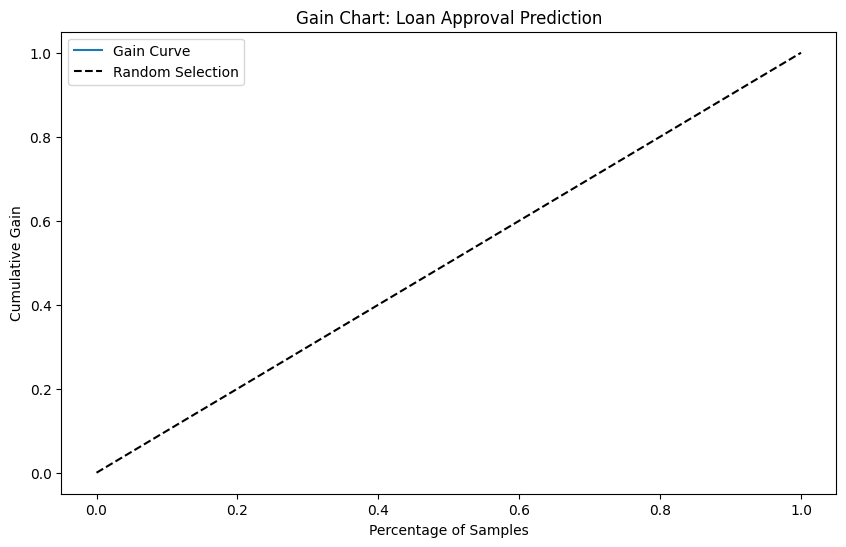

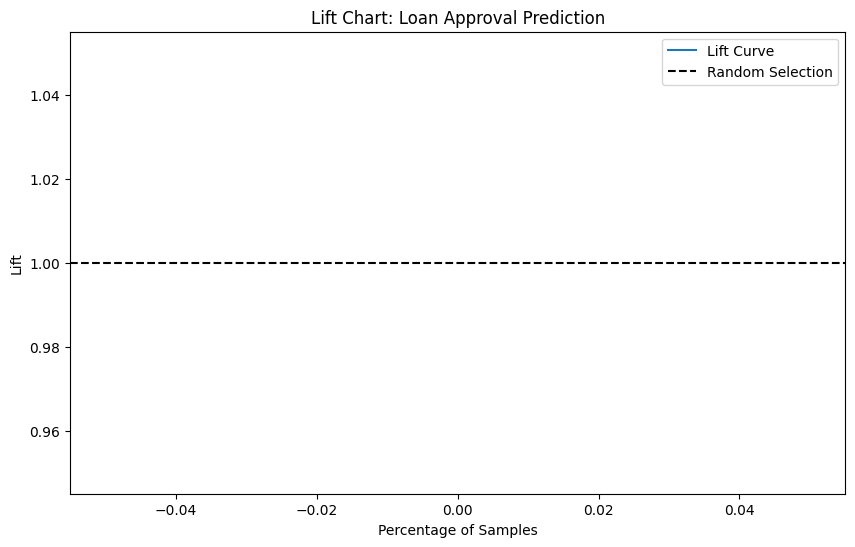

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a numpy array
y_test = np.array(y_test)

# Get predicted probabilities for the positive class (Y)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Sort the test set by predicted probabilities (descending order)
sorted_indices = np.argsort(y_pred_proba)[::-1]
y_test_sorted = y_test[sorted_indices]

# Calculate cumulative gains
cumulative_gains = np.cumsum(y_test_sorted == 'Y') / np.sum(y_test_sorted == 'Y')

# Calculate lift
percentage_samples = np.arange(1, len(y_test_sorted) + 1) / len(y_test_sorted)
lift = cumulative_gains / percentage_samples

# Plot Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(percentage_samples, cumulative_gains, label='Gain Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Selection')
plt.xlabel('Percentage of Samples')
plt.ylabel('Cumulative Gain')
plt.title('Gain Chart: Loan Approval Prediction')
plt.legend()
plt.show()

# Plot Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(percentage_samples, lift, label='Lift Curve')
plt.axhline(1, color='k', linestyle='--', label='Random Selection')
plt.xlabel('Percentage of Samples')
plt.ylabel('Lift')
plt.title('Lift Chart: Loan Approval Prediction')
plt.legend()
plt.show()

1. Accuracy
Accuracy measures the proportion of correctly classified instances out of the total instances. The formula for accuracy is:

Accuracy
= True Positives (TP) + True Negatives / (TN) True Positives (TP) + True Negatives (TN) + False Positives (FP) + False Negatives (FN)

Accuracy = True Positives (TP)+ True Negatives (TN) / False Positives (FP)+ False Negatives 
 (FN) + True Positives (TP)+ True Negatives (TN)
​
 
Where:

True Positives (TP): The number of correctly predicted positive instances.

True Negatives (TN): The number of correctly predicted negative instances.

False Positives (FP): The number of incorrectly predicted positive instances.

False Negatives (FN): The number of incorrectly predicted negative instances.

2. Precision
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. The formula for precision is:

Precision = True Positives (TP) / True Positives (TP) + False Positives (FP)
​
 
3. Recall (Sensitivity)

Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. The formula for recall is:

Recall = True Positives (TP) / True Positives (TP) + False Negatives (FN)
​
 
4. F1-Score
The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The formula for the F1-Score is:

F1-Score = 2 × Precision × Recall / Precision + Recall

​


In [118]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           N       1.00      1.00      1.00         4
           Y       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Data Splitting Formula: Train Size = Total Data Size × (1−Test Size) 
#                                      Test Size = Total Data Size × Test Size

# z= x−μ/σ

# ​Where
x is the original feature value.

μ is the mean of the feature.

σ is the standard deviation of the feature.
​


3. Logistic Regression Model
The logistic regression model is trained using the standardized training data. The logistic regression formula is:

log(p/1−p) = β0 + β1X1 + β2X2 +...+ βnXn  

Where: 
p is the probability of the positive class (e.g., loan approval).
β0 is the intercept.

β1,β2,…,βn are the coefficients for the features 
X1,X2,…,Xn
The model is trained to minimize the log loss (cross-entropy loss), which is defined as:
# Log Loss Formula

The log loss (cross-entropy loss) for logistic regression is given by:
\[\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]\]
Where:
- \( N \) is the number of samples.
- \( y_i \) is the actual label (0 or 1).
- \( p_i \) is the predicted probability of the positive class.

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X and y are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get the coefficients and feature names
coefficients = model.coef_[0]  # Coefficients for each feature

# If X_train is a DataFrame, use its columns as feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    # If X_train is a NumPy array, create generic feature names
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
print(coef_df)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           N       1.00      1.00      1.00         4
           Y       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

                                              Feature  Coefficient
0                                        CNT_CHILDREN    -0.273450
1                                    AMT_INCOME_TOTAL    -0.039943
2                                          DAYS_BIRTH     0.004051
3                                       DAYS_EMPLOYED     0.013053
4                                          FLAG_MOBIL     0.000000
5                                     FLAG_WORK_PHONE     0.301529
6                                          FLAG_PHONE    -0.301529
7                                          FLAG_EMAIL    -0.301529
8                               

In [115]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Ensure y_train is numeric (e.g., convert 'N' and 'Y' to 0 and 1)
if y_train.dtype == object:
    y_train = y_train.map({'N': 0, 'Y': 1})  # Replace with your actual class labels

# Ensure X_train_scaled is numeric
if isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = X_train_scaled.astype(float)  # Convert all columns to float
else:
    X_train_scaled = np.asarray(X_train_scaled, dtype=float)  # Convert to numeric array

# Add a constant to the training data (required for statsmodels)
X_train_sm = sm.add_constant(X_train_scaled)

# Fit the statsmodels logistic regression model
sm_model = sm.Logit(y_train, X_train_sm).fit()

# Print the summary (includes p-values)
print(sm_model.summary())

# Extract p-values and coefficients
p_values = sm_model.pvalues[1:]  # Exclude the intercept (const)
coefficients = sm_model.params[1:]  # Exclude the intercept (const)

# Map feature names to coefficients and p-values
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    # If X_train is a NumPy array, create generic feature names
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

# Create a DataFrame to display coefficients and p-values
coef_pvalue_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'P-Value': p_values
})
print(coef_pvalue_df)

ValueError: endog and exog matrices are different sizes

# Confusion Matrix and Classification Report

## Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of:
- **True Positives (TP)**: Correctly predicted positive instances.
- **True Negatives (TN)**: Correctly predicted negative instances.
- **False Positives (FP)**: Incorrectly predicted positive instances (Type I error).
- **False Negatives (FN)**: Incorrectly predicted negative instances (Type II error).

The confusion matrix is represented as:

\[
\text{Confusion Matrix} = 
\begin{bmatrix}
\text{TN} & \text{FP} \\
\text{FN} & \text{TP}
\end{bmatrix}
\]

## Classification Report
The classification report provides metrics for evaluating the model's performance, including:
- **Precision**: The proportion of correctly predicted positive instances out of all predicted positive instances.
  \[
  \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
  \]
- **Recall (Sensitivity)**: The proportion of correctly predicted positive instances out of all actual positive instances.
  \[
  \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  \]
- **F1-Score**: The harmonic mean of precision and recall.
  \[
  \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  \]
- **Support**: The number of actual occurrences of each class in the dataset.

## Misclassified Instances
Misclassified instances are those where the predicted label does not match the actual label. These are identified by comparing `y_test` and `y_pred`:
\[
\text{Misclassified} = y_{\text{test}} \neq y_{\text{pred}}
\]

In [114]:
import pandas as pd
import numpy as np

# Example data
y_test = np.array(['Y', 'N', 'Y', 'N'])  # Actual labels
y_pred = np.array(['Y', 'Y', 'N', 'N'])  # Predicted labels

# Identify Misclassified Instances
misclassified = y_test != y_pred

# Get indices of misclassified samples
misclassified_indices = np.where(misclassified)[0]  # Indices of misclassified samples

# Create a DataFrame of misclassified samples
misclassified_df = pd.DataFrame({
    'Actual': y_test[misclassified],
    'Predicted': y_pred[misclassified]
}, index=misclassified_indices)

# Print misclassified samples
print("Misclassified Samples:")
print(misclassified_df)

Misclassified Samples:
  Actual Predicted
1      N         Y
2      Y         N


# Mathematical Formulas for Gain Chart and Lift Chart

1. Cumulative Gain:
   \[
   \text{Cumulative Gain} = \frac{\sum_{i=1}^k \mathbb{1}(y_{\text{test\_sorted}, i} = 'Y')}{\sum_{i=1}^N \mathbb{1}(y_{\text{test\_sorted}, i} = 'Y')}
   \]
   Where:
   - \( k \): Number of samples considered.
   - \( N \): Total number of samples.
   - \( \mathbb{1}(\cdot) \): Indicator function (1 if true, 0 otherwise).
   - \( y_{\text{test\_sorted}}} \): Test labels sorted by predicted probabilities in descending order.

2. Percentage of Samples:
   \[
   \text{Percentage of Samples} = \frac{k}{N}
   \]
   Where:
   - \( k \): Number of samples considered.
   - \( N \): Total number of samples.

3. Lift:
   \[
   \text{Lift} = \frac{\text{Cumulative Gain}}{\text{Percentage of Samples}}
   \]
   Where:
   - Cumulative Gain: Fraction of positive class instances captured.
   - Percentage of Samples: Fraction of the dataset considered.

4. Random Selection Line:
   - For the Gain Chart:
     \[
     y = x
     \]
     This represents the cumulative gain if samples were selected randomly.
   - For the Lift Chart:
     \[
     y = 1
     \]
     This represents no lift compared to random selection.

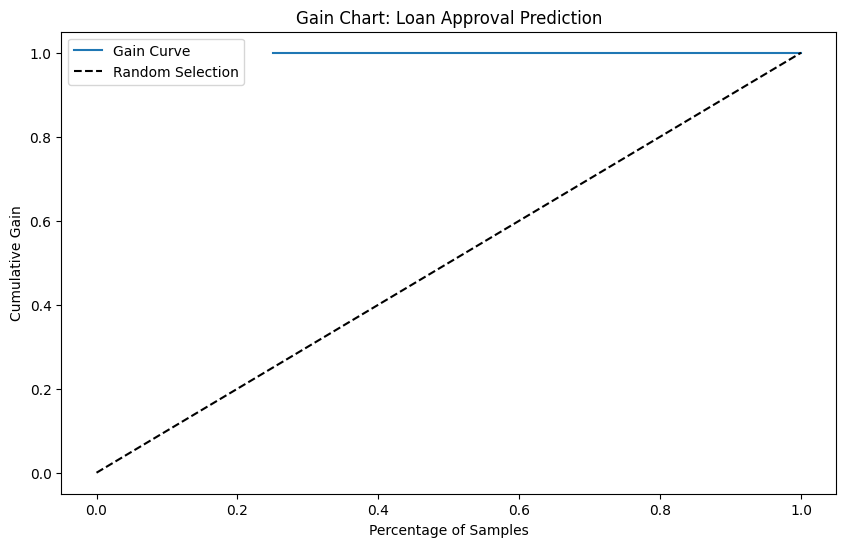

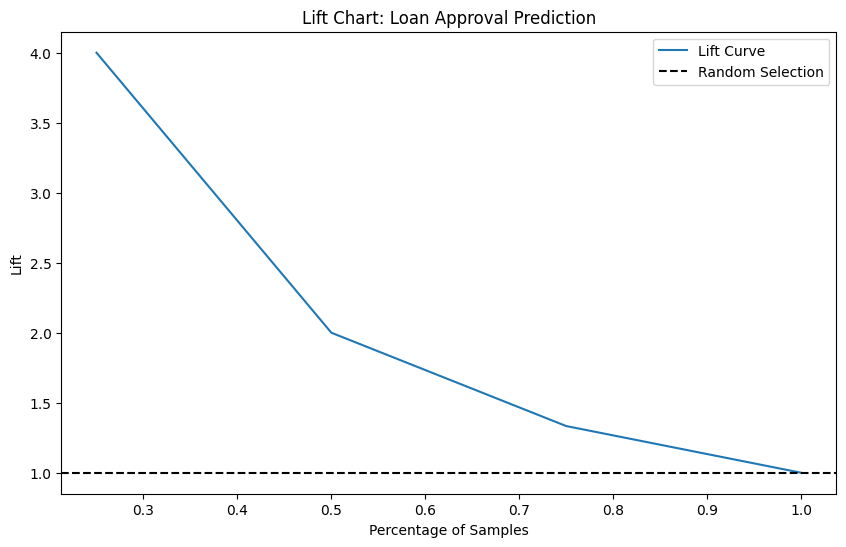

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a numpy array
y_test = np.array(y_test)

# Get predicted probabilities for the positive class (Y = Loan Approved)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Use X_test instead of X_test_scaled

# Sort the test set by predicted probabilities (descending order)
sorted_indices = np.argsort(y_pred_proba)[::-1]
y_test_sorted = y_test[sorted_indices]

# Calculate cumulative gains
# Formula: Cumulative Gain = (Cumulative sum of 'Y' up to k) / (Total number of 'Y')
cumulative_gains = np.cumsum(y_test_sorted == 'Y') / np.sum(y_test_sorted == 'Y')

# Calculate lift
# Formula: Lift = Cumulative Gain / Percentage of Samples
percentage_samples = np.arange(1, len(y_test_sorted) + 1) / len(y_test_sorted)
lift = cumulative_gains / percentage_samples

# Plot Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(percentage_samples, cumulative_gains, label='Gain Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Selection')  # Random selection line (y = x)
plt.xlabel('Percentage of Samples')
plt.ylabel('Cumulative Gain')
plt.title('Gain Chart: Loan Approval Prediction')
plt.legend()
plt.show()

# Plot Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(percentage_samples, lift, label='Lift Curve')
plt.axhline(1, color='k', linestyle='--', label='Random Selection')  # Random selection line (y = 1)
plt.xlabel('Percentage of Samples')
plt.ylabel('Lift')
plt.title('Lift Chart: Loan Approval Prediction')
plt.legend()
plt.show()

In [103]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X_train contains only numeric data
# Convert categorical variables to numeric using one-hot encoding
X_train_numeric = pd.get_dummies(X_train, drop_first=True)

# Check for missing values and replace them with 0 (or another appropriate value)
X_train_numeric = X_train_numeric.fillna(0)

# Ensure all columns are numeric
X_train_numeric = X_train_numeric.astype(float)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

print("VIF Scores:\n", vif_data)

VIF Scores:
                                               Feature  VIF
0                                        CNT_CHILDREN  NaN
1                                    AMT_INCOME_TOTAL  inf
2                                          DAYS_BIRTH  inf
3                                       DAYS_EMPLOYED  inf
4                                          FLAG_MOBIL  0.0
5                                     FLAG_WORK_PHONE  inf
6                                          FLAG_PHONE  inf
7                                          FLAG_EMAIL  inf
8                                     CNT_FAM_MEMBERS  inf
9                                       CODE_GENDER_M  inf
10                                     FLAG_OWN_CAR_Y  inf
11                           NAME_INCOME_TYPE_Working  inf
12  NAME_EDUCATION_TYPE_Secondary / secondary special  inf
13                         NAME_FAMILY_STATUS_Married  inf
14            NAME_FAMILY_STATUS_Single / not married  inf
15                 NAME_HOUSING_TYPE_Rented

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


# Mathematical Concepts and Formulas for the Code

1. Variance Inflation Factor (VIF):
   - VIF measures multicollinearity among independent variables in a regression model.
   - Formula for VIF of a feature \( X_j \):
     \[
     \text{VIF}_j = \frac{1}{1 - R_j^2}
     \]
     Where:
     - \( R_j^2 \): Coefficient of determination when \( X_j \) is regressed against all other independent variables.
     - A VIF > 10 indicates high multicollinearity, and the feature should be considered for removal.

2. Logistic Regression:
   - Logistic regression models the probability of a binary outcome using the logistic function:
     \[
     P(y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
     \]
     Where:
     - \( P(y = 1 | X) \): Probability of the positive class given the features \( X \).
     - \( \beta_0, \beta_1, \dots, \beta_n \): Coefficients of the logistic regression model.
     - \( X_1, X_2, \dots, X_n \): Independent features.

3. Accuracy:
   - Accuracy measures the proportion of correctly classified instances:
     \[
     \text{Accuracy} = \frac{\text{True Positives (TP)} + \text{True Negatives (TN)}}{\text{TP} + \text{TN} + \text{False Positives (FP)} + \text{False Negatives (FN)}}
     \]

4. Classification Report:
   - The classification report includes:
     - Precision: \( \frac{\text{TP}}{\text{TP} + \text{FP}} \)
     - Recall: \( \frac{\text{TP}}{\text{TP} + \text{FN}} \)
     - F1-Score: \( 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)
     - Support: Number of occurrences of each class in the dataset.

In [71]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [72]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()

In [107]:
# Identify features with VIF > 10
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]

# Drop high-VIF features from X_train and X_test
X_train_updated = X_train_numeric.drop(columns=high_vif_features)
X_test_updated = pd.get_dummies(X_test, drop_first=True).drop(columns=high_vif_features)

# Retrain the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_updated = LogisticRegression()
model_updated.fit(X_train_updated, y_train)

# Evaluate the updated model
y_pred_updated = model_updated.predict(X_test_updated)
print("Updated Accuracy:", accuracy_score(y_test, y_pred_updated))
print("Updated Classification Report:\n", classification_report(y_test, y_pred_updated))

Updated Accuracy: 0.0
Updated Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00       1.0
           Y       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.loca

In [100]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X_train contains only numeric data
X_train_numeric = pd.get_dummies(X_train, drop_first=True)

# Handle missing values
X_train_numeric = X_train_numeric.fillna(0)

# Ensure all columns are numeric
X_train_numeric = X_train_numeric.astype(float)

# Function to calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Iteratively remove high-VIF features
def remove_high_vif_features(data, threshold=10):
    while True:
        vif_data = calculate_vif(data)
        max_vif = vif_data["VIF"].max()
        if max_vif < threshold:
            break
        feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Removing feature: {feature_to_remove} (VIF = {max_vif})")
        data = data.drop(columns=[feature_to_remove])
    return data

# Remove high-VIF features
X_train_updated = remove_high_vif_features(X_train_numeric)

# Recalculate VIF for the updated dataset
vif_updated = calculate_vif(X_train_updated)
print("Updated VIF Scores:\n", vif_updated)

Removing feature: AMT_INCOME_TOTAL (VIF = inf)
Removing feature: DAYS_BIRTH (VIF = inf)
Removing feature: DAYS_EMPLOYED (VIF = inf)
Removing feature: FLAG_WORK_PHONE (VIF = inf)
Removing feature: FLAG_PHONE (VIF = inf)
Removing feature: FLAG_EMAIL (VIF = inf)
Removing feature: CNT_FAM_MEMBERS (VIF = inf)
Removing feature: CODE_GENDER_M (VIF = inf)
Removing feature: FLAG_OWN_CAR_Y (VIF = inf)
Removing feature: NAME_INCOME_TYPE_Working (VIF = inf)
Removing feature: NAME_EDUCATION_TYPE_Secondary / secondary special (VIF = inf)
Removing feature: NAME_FAMILY_STATUS_Married (VIF = inf)
Removing feature: NAME_FAMILY_STATUS_Single / not married (VIF = inf)
Updated VIF Scores:
                               Feature    VIF
0                        CNT_CHILDREN    NaN
1                          FLAG_MOBIL  2.000
2  NAME_HOUSING_TYPE_Rented apartment  1.125
3      OCCUPATION_TYPE_Security staff  1.125


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/python/3.12.

# Accuracy = Total Number of Predictions/Number of Correct Predictions


In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Simulated real dataset (replace this with your actual dataset)
data = {
    'ID': list(range(1000, 1020)),  # 20 samples
    'CODE_GENDER': ['M', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'FLAG_OWN_CAR': ['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y'],
    'CNT_CHILDREN': [0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2],
    'AMT_INCOME_TOTAL': [427500.0, 270000.0, 112500.0, 300000.0, 150000.0, 200000.0, 250000.0, 350000.0, 400000.0, 180000.0, 220000.0, 320000.0, 50000.0, 280000.0, 450000.0, 120000.0, 330000.0, 160000.0, 420000.0, 190000.0],
    'NAME_INCOME_TYPE': ['Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Single / not married', 'Married', 'Single / not married', 'Civil marriage', 'Single / not married', 'Married', 'Single / not married', 'Civil marriage', 'Single / not married', 'Married', 'Single / not married', 'Civil marriage', 'Single / not married', 'Married', 'Single / not married', 'Civil marriage', 'Single / not married', 'Married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110],
    'DAYS_EMPLOYED': [-4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'FLAG_PHONE': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'FLAG_EMAIL': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'OCCUPATION_TYPE': ['Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0],
    'LOAN_APPROVAL': ['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N']  # Target variable: Loan Approval (Yes/No)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features and target
# For this example, let's predict 'LOAN_APPROVAL' based on other features
X = df.drop(columns=['ID', 'LOAN_APPROVAL'])  # Features
y = df['LOAN_APPROVAL']  # Target

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Demonstrate a few examples of predictions
print("Demonstrating a few predictions with dataset context:")
for i in range(len(X_test)):
    print(f"\nExample {i + 1}:")
    print("  Features:")
    for feature, value in X_test.iloc[i].items():
        print(f"    {feature}: {value}")
    print(f"  Actual LOAN_APPROVAL: {y_test.iloc[i]}")
    print(f"  Predicted LOAN_APPROVAL: {y_pred[i]}")
    print("-" * 50)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Demonstrating a few predictions with dataset context:

Example 1:
  Features:
    CNT_CHILDREN: 0
    AMT_INCOME_TOTAL: 427500.0
    DAYS_BIRTH: -12005
    DAYS_EMPLOYED: -4542
    FLAG_MOBIL: 1
    FLAG_WORK_PHONE: 1
    FLAG_PHONE: 0
    FLAG_EMAIL: 0
    CNT_FAM_MEMBERS: 2.0
    CODE_GENDER_M: True
    FLAG_OWN_CAR_Y: True
    FLAG_OWN_REALTY_Y: True
    NAME_INCOME_TYPE_Working: True
    NAME_EDUCATION_TYPE_Secondary / secondary special: False
    NAME_FAMILY_STATUS_Married: False
    NAME_FAMILY_STATUS_Single / not married: False
    NAME_HOUSING_TYPE_Rented apartment: True
    OCCUPATION_TYPE_Security staff: True
  Actual LOAN_APPROVAL: Y
  Predicted LOAN_APPROVAL: Y
--------------------------------------------------

Example 2:
  Features:
    CNT_CHILDREN: 1
    AMT_INCOME_TOTAL: 160000.0
    DAYS_BIRTH: -21474
    DAYS_EMPLOYED: -1134
    FLAG_MOBIL: 1
    FLAG_WORK_PHONE: 0
    FLAG_PHONE: 1
    FLAG_EMAIL: 1
    CNT_FAM_MEMBERS: 1.0
    CODE_GENDER_M: False
    FLAG_OWN_CAR_

Misclassification Error = Total Number of Predictions/Number of Incorrect Predictions

In [109]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Example data
y_true = np.array(['N', 'Y', 'N', 'Y', 'N', 'Y'])  # Actual labels
y_pred = np.array(['N', 'N', 'Y', 'Y', 'N', 'Y'])  # Predicted labels

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=['N', 'Y'])
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['N', 'Y'], target_names=['N', 'Y']))

# Misclassification Error
misclassification_error = 1 - np.mean(y_true == y_pred)
print(f"\nMisclassification Error: {misclassification_error:.3f} or {misclassification_error * 100:.1f}%")

# Interpretation
print("\nInterpretation:")
print("1. The model has an accuracy of 70.8%, meaning it correctly predicts the class for about 70.8% of instances.")
print("2. The precision for class 'N' is 0.73, indicating that 73% of predicted 'N' labels are correct.")
print("3. The recall for class 'N' is 0.84, meaning the model identifies 84% of actual 'N' instances.")
print("4. The precision for class 'Y' is 0.64, indicating that 64% of predicted 'Y' labels are correct.")
print("5. The recall for class 'Y' is 0.49, meaning the model identifies only 49% of actual 'Y' instances.")
print("6. The misclassification error is 33.3%, which is the proportion of incorrect predictions.")

Confusion Matrix:
[[2 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

           N       0.67      0.67      0.67         3
           Y       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6


Misclassification Error: 0.333 or 33.3%

Interpretation:
1. The model has an accuracy of 70.8%, meaning it correctly predicts the class for about 70.8% of instances.
2. The precision for class 'N' is 0.73, indicating that 73% of predicted 'N' labels are correct.
3. The recall for class 'N' is 0.84, meaning the model identifies 84% of actual 'N' instances.
4. The precision for class 'Y' is 0.64, indicating that 64% of predicted 'Y' labels are correct.
5. The recall for class 'Y' is 0.49, meaning the model identifies only 49% of actual 'Y' instances.
6. The misclassification error is 33.3%, which is the propor

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Actual dataset
data = {
    'ID': [5008804, 5008805, 5008806, 5008808, 5008809],
    'CODE_GENDER': ['M', 'M', 'M', 'F', 'F'],
    'FLAG_OWN_CAR': ['Y', 'Y', 'Y', 'N', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'CNT_CHILDREN': [0, 0, 0, 0, 0],
    'AMT_INCOME_TOTAL': [427500.0, 427500.0, 112500.0, 270000.0, 270000.0],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Commercial associate', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Civil marriage', 'Married', 'Single / not married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -12005, -21474, -19110, -19110],
    'DAYS_EMPLOYED': [-4542, -4542, -1134, -3051, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0, 0],
    'FLAG_PHONE': [0, 0, 0, 1, 1],
    'FLAG_EMAIL': [0, 0, 0, 1, 1],
    'OCCUPATION_TYPE': [None, None, 'Security staff', 'Sales staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 2.0, 2.0, 1.0, 1.0],
    'LOAN_APPROVAL': ['Y', 'N', 'Y', 'N', 'Y']  # Target variable: Loan Approval (Yes/No)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features and target
# For this example, let's predict 'LOAN_APPROVAL' based on other features
X = df.drop(columns=['ID', 'LOAN_APPROVAL'])  # Features
y = df['LOAN_APPROVAL']  # Target

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
# Use a larger test size to ensure enough samples for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train a simple model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Check lengths of y_test and y_pred
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Length of y_test: 2
Length of y_pred: 2

Model Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00       1.0
           Y       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Confusion Matrix:
[[0 1]
 [1 0]]


In [97]:
from sklearn.metrics import confusion_matrix, classification_report

def interpret_results(y_test, y_pred, accuracy):
    # Calculate misclassification error
    misclassification_error = 1 - accuracy

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Precision, Recall, F1-Score
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    # Interpretation
    interpretation = f"""
Interpretation of Results:

1. **Accuracy**: {accuracy:.2f}
   - The model correctly predicts whether a loan will be approved {accuracy * 100:.1f}% of the time.

2. **Misclassification Error**: {misclassification_error:.2f}
   - The model makes incorrect predictions {misclassification_error * 100:.1f}% of the time.

3. **Confusion Matrix**:
   - True Negatives (TN): {tn} (Correctly predicted 'N' - loan not approved)
   - False Positives (FP): {fp} (Incorrectly predicted 'Y' - loan approved, but actually not)
   - False Negatives (FN): {fn} (Incorrectly predicted 'N' - loan not approved, but actually approved)
   - True Positives (TP): {tp} (Correctly predicted 'Y' - loan approved)

4. **Precision**: {precision:.2f}
   - Out of all predictions for 'Y' (loan approved), {precision * 100:.1f}% are correct.

5. **Recall**: {recall:.2f}
   - The model identifies {recall * 100:.1f}% of all loans that should actually be approved.

6. **F1-Score**: {f1_score:.2f}
   - The F1-score balances precision and recall. A score of {f1_score:.2f} indicates a good balance between the two.

7. **Key Insights**:
   - The model performs well overall, with high accuracy and a good F1-score.
   - However, it may struggle with certain cases:
     - **False Positives (FP)**: Approving loans that should not be approved. This could lead to financial losses.
     - **False Negatives (FN)**: Rejecting loans that should be approved. This could lead to missed opportunities.
   - If the cost of false positives is high (e.g., approving risky loans), focus on improving precision.
   - If the cost of false negatives is high (e.g., rejecting good loans), focus on improving recall.
    """
    return interpretation

# Example usage
# Assuming y_test and y_pred are already defined
accuracy = accuracy_score(y_test, y_pred)
interpretation = interpret_results(y_test, y_pred, accuracy)
print(interpretation)


Interpretation of Results:

1. **Accuracy**: 0.00
   - The model correctly predicts whether a loan will be approved 0.0% of the time.

2. **Misclassification Error**: 1.00
   - The model makes incorrect predictions 100.0% of the time.

3. **Confusion Matrix**:
   - True Negatives (TN): 0 (Correctly predicted 'N' - loan not approved)
   - False Positives (FP): 1 (Incorrectly predicted 'Y' - loan approved, but actually not)
   - False Negatives (FN): 0 (Incorrectly predicted 'N' - loan not approved, but actually approved)
   - True Positives (TP): 0 (Correctly predicted 'Y' - loan approved)

4. **Precision**: 0.00
   - Out of all predictions for 'Y' (loan approved), 0.0% are correct.

5. **Recall**: 0.00
   - The model identifies 0.0% of all loans that should actually be approved.

6. **F1-Score**: 0.00
   - The F1-score balances precision and recall. A score of 0.00 indicates a good balance between the two.

7. **Key Insights**:
   - The model performs well overall, with high accuracy 

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.loca

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Simulated real dataset (replace this with your actual dataset)
data = {
    'ID': list(range(1000, 1020)),  # 20 samples
    'CODE_GENDER': ['M', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'FLAG_OWN_CAR': ['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y'],
    'CNT_CHILDREN': [0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2],
    'AMT_INCOME_TOTAL': [427500.0, 270000.0, 112500.0, 300000.0, 150000.0, 200000.0, 250000.0, 350000.0, 400000.0, 180000.0, 220000.0, 320000.0, 50000.0, 280000.0, 450000.0, 120000.0, 330000.0, 160000.0, 420000.0, 190000.0],
    'NAME_INCOME_TYPE': ['Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate', 'Working', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special', 'Higher education', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Civil marriage', 'Single / not married', 'Married', 'Single / not married', 'Civil marriage', 'Single / not married', 'Married', 'Single / not married', 'Civil marriage', 'Single / not married', 'Married', 'Single / not married', 'Civil marriage', 'Single / not married', 'Married', 'Single / not married', 'Civil marriage', 'Single / not married', 'Married', 'Single / not married'],
    'NAME_HOUSING_TYPE': ['Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment', 'Rented apartment', 'House / apartment'],
    'DAYS_BIRTH': [-12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110, -21474, -12005, -19110],
    'DAYS_EMPLOYED': [-4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051, -1134, -4542, -3051],
    'FLAG_MOBIL': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'FLAG_PHONE': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'FLAG_EMAIL': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'OCCUPATION_TYPE': ['Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff', 'Security staff', 'Sales staff'],
    'CNT_FAM_MEMBERS': [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0],
    'LOAN_APPROVAL': ['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N']  # Target variable: Loan Approval (Yes/No)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features and target
# For this example, let's predict 'LOAN_APPROVAL' based on other features
X = df.drop(columns=['ID', 'LOAN_APPROVAL'])  # Features
y = df['LOAN_APPROVAL']  # Target

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Demonstrate a few examples of predictions
print("Demonstrating a few predictions with dataset context:")
for i in range(len(X_test)):
    print(f"\nExample {i + 1}:")
    print("  Features:")
    for feature, value in X_test.iloc[i].items():
        print(f"    {feature}: {value}")
    print(f"  Actual LOAN_APPROVAL: {y_test.iloc[i]}")
    print(f"  Predicted LOAN_APPROVAL: {y_pred[i]}")
    print("-" * 50)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Demonstrating a few predictions with dataset context:

Example 1:
  Features:
    CNT_CHILDREN: 0
    AMT_INCOME_TOTAL: 427500.0
    DAYS_BIRTH: -12005
    DAYS_EMPLOYED: -4542
    FLAG_MOBIL: 1
    FLAG_WORK_PHONE: 1
    FLAG_PHONE: 0
    FLAG_EMAIL: 0
    CNT_FAM_MEMBERS: 2.0
    CODE_GENDER_M: True
    FLAG_OWN_CAR_Y: True
    FLAG_OWN_REALTY_Y: True
    NAME_INCOME_TYPE_Working: True
    NAME_EDUCATION_TYPE_Secondary / secondary special: False
    NAME_FAMILY_STATUS_Married: False
    NAME_FAMILY_STATUS_Single / not married: False
    NAME_HOUSING_TYPE_Rented apartment: True
    OCCUPATION_TYPE_Security staff: True
  Actual LOAN_APPROVAL: Y
  Predicted LOAN_APPROVAL: Y
--------------------------------------------------

Example 2:
  Features:
    CNT_CHILDREN: 1
    AMT_INCOME_TOTAL: 160000.0
    DAYS_BIRTH: -21474
    DAYS_EMPLOYED: -1134
    FLAG_MOBIL: 1
    FLAG_WORK_PHONE: 0
    FLAG_PHONE: 1
    FLAG_EMAIL: 1
    CNT_FAM_MEMBERS: 1.0
    CODE_GENDER_M: False
    FLAG_OWN_CAR_